In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.random import uniform as np_uniform 
from scipy.stats import uniform
import seaborn as sb

##  question 1 

In [ ]:
np.random.seed(15100873)
a=np_uniform(0,1,20000)
b=np_uniform(0,2,20000)
x=np.linspace(0,3,20000)
def pdf_s(s):
    if s<0:
        return 0 
    if 0<=s<1:
        return s/2
    if 1<=s<2:
        return 1/2
    if 2<=s<=3:
        return (3-s)/2
    return 0
s=list(map(pdf_s, x))
plt.plot(x,s)
plt.xlabel("s")
plt.ylabel("f_{s}(s)")
plt.show()
sb.histplot(data=(a+b), stat = "probability")

#plt.hist(a+b)


question 4

In [ ]:
from scipy.stats import norm
data=pd.read_csv('/mnt/c/Users/buzga/Desktop/School/grad_school/spring_2023/prob_stats_2/homework/homework_3/cardio.csv' ,sep=";")
data=data["ap_hi"]
def show_chevchevs_bound():
    a=np.linspace(1,1000,10000)
    plt.plot(a,np.var(data)/(a**2))
    plt.yscale('log')
    plt.ylabel("log of bound")
    plt.xlabel("c")
    plt.title("bound given by Chebyshev's inequality on given data")
    plt.show()
show_chevchevs_bound()

In [89]:
def monte_carlo(trials, max_sample_size,c=[.25,.5,1,10], show_dist=False, show_bound=True):
    temp_bias=[]
    for sample_size in np.linspace(0.001, 0.999, 1000)*len(data):
        bias_out=[]
        bias= lambda x: np.mean(x)-np.mean(data)
        for trial in range(trials):
            x=np.random.choice(data, int(sample_size))
            bias_out.append(bias(x))
        bias_out=np.array(bias_out)
        temp_bias.append(sum(abs(bias_out)>=.5)/trials)
    #return temp_bias
    plt.plot(np.linspace(0.001, 0.999, 1000)*len(data),temp_bias,"o", label="monte-carlo simulation estimate ")
    plt.xlabel("value of c")
    plt.ylabel("probability |x-mu|>c")
    plt.title("probability sample bias bellow different thresholds for different sample size")
            #return temp_bias
    plt.legend()
#monte_carlo(20,1000,c=[.5], show_dist=False, show_bound=True)

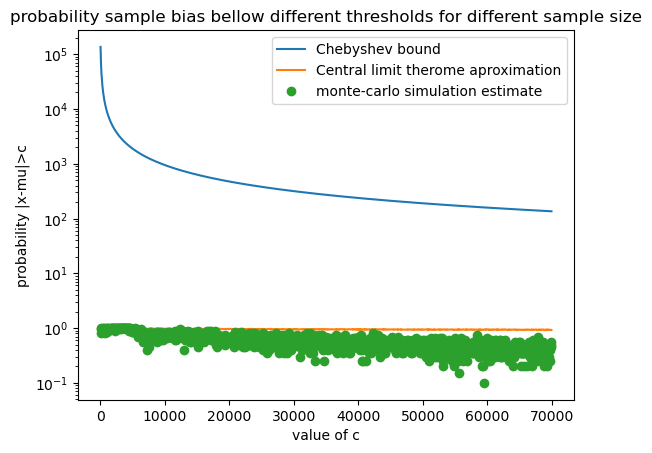

In [90]:
def gausian_estimate(n,epsilon, trials=1000):
    gausina=norm(loc=np.mean(data), scale=np.std(data)/(n)**(1/2))
    rvs=gausina.rvs(trials)
    return (sum(abs(rvs-np.mean(data))>=epsilon)/trials)
x=np.linspace(0.001, 0.999, 1000)*len(data)
epsilon=.05
chevs=lambda n: (np.var(data) /(n*(epsilon**2)))
list(map(chevs,x))
plt.plot(x, list(map(chevs,x)),label= "Chebyshev bound")
y=[epsilon]*1000*5
plt.plot(x,list(map(gausian_estimate,x,y)), label="Central limit therome aproximation")
monte_carlo(20,1000,c=[.5], show_dist=False, show_bound=True)
plt.yscale("log")
plt.legend()

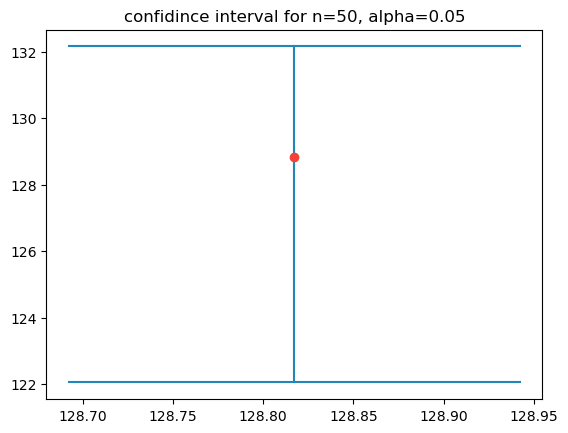

5.051158401326


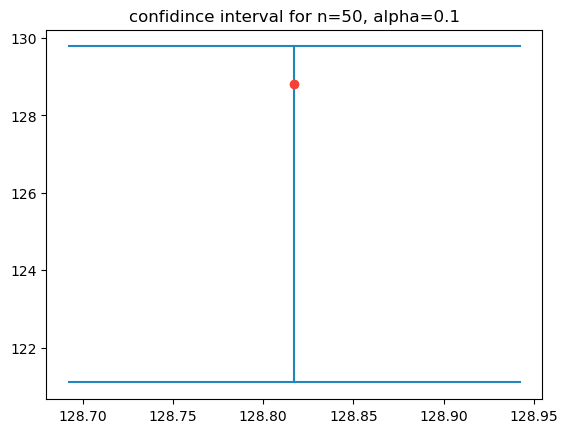

4.343699361263609


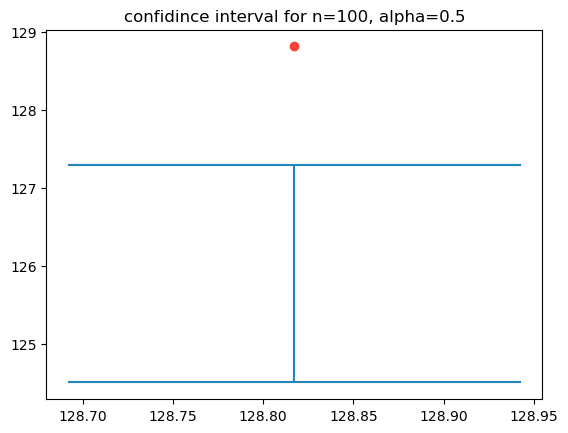

1.3973663162075711


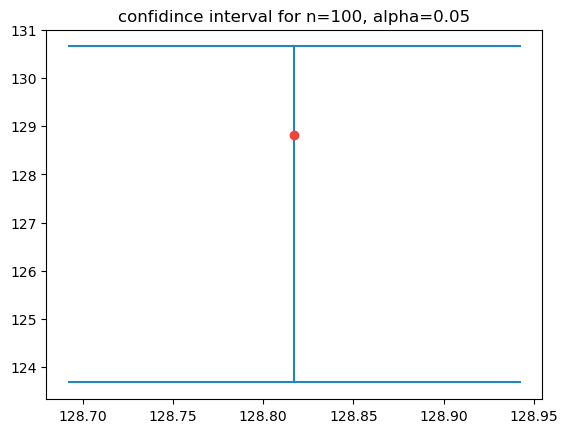

3.4878609561479346


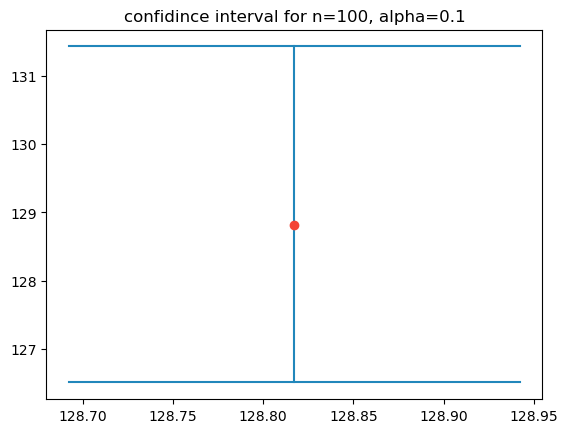

2.462500800765953


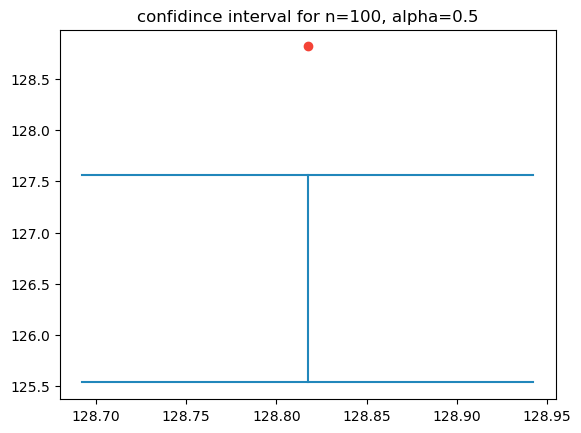

1.0147596859949526


(126.55, 1.0147596859949526)

In [111]:


import matplotlib.pyplot as plt
import statistics
from math import sqrt


def plot_confidence_interval(n,alpha):
    horizontal_line_width=0.25
    color='#2187bb'
    x=np.mean(data)
    z=stats.norm.ppf(1-(alpha)/2)
    values=sample=np.random.choice(data, n)
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, x, 'o', color='#f44336')
    plt.title("confidince interval for n={0}, alpha={1}".format(n,alpha))
    plt.show()
    print(confidence_interval)
    return mean, confidence_interval
plot_confidence_interval(50,.05)
plot_confidence_interval(50,.1)
plot_confidence_interval(100,.5)
plot_confidence_interval(100,.05)
plot_confidence_interval(100,.1)
plot_confidence_interval(100,.5)


## we make a mistake with a probaility of alpha so as alpha rsies our intervals get more tigth same with n 
 ## our liklyhood of making a mistake is rising in both 
